# 앙상블 방법론
- 부스팅과 배깅이 있음
- 배깅 : 샘플을 여러번 뽑아서 결과물을 집계하는 방식 / random forest 계열이 해당

- 부스팅 : 가중치를 활용해서 약한 분류기를 강한 분류기로 만드는 방식 / ada boost, gradient boost 등등

In [1]:
!pip install xgboost

In [5]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
#유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#데이터를 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

#알고리즘을 불러오기
model = xgboost.XGBClassifier(n_estimators=5, random_state= 0, eval_metric = 'rmse')
#학습 시키기
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [12]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9953051643192489
0.986013986013986


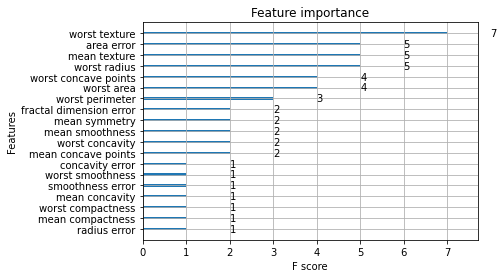

In [23]:
n_features = cancer.feature_names.tolist()
model.get_booster().feature_names = n_features
xgboost.plot_importance(model.get_booster())
plt.show()